<a href="https://colab.research.google.com/github/G2JL/Computer_Vision/blob/main/A02_1902172.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# &emsp;&emsp; Universidad Autonoma de Nuevo Leon
<br>

# &emsp; Facultad de Ingeniería Mecánica y Eléctrica
<br>

## &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Visión por computadora</h2>
<br>

## &emsp; Actividad 2: Transfromaciones 2D y 3D

### Nombre: Juan Luis García Gaspar

### Matrícula: 1902172

### Carrera: Ingeniero Biomédico

### Fecha: 16/03/2025

<font color='red'>WARNING-1: No se aceptan soluciones que usen metodologías distintas a las vistas en clases.</font>

<font color='orange'>Está permitido usar los códigos de los ejemplos vistos en clases. Los enlaces se encuentran en el block de notas de teams</font>



# 0) Cambiar el nombre del archivo

<font color='red'>WARNING-2: CAMBIA EL NOMBRE DEL ARCHIVO ipynb INCLUYENDO TU MATRÍCULA</font>

Ejemplo, si su matrícula es 1234567, el nombre de este archivo debe cambiarse de "E02_MATRÍCULA.ipynb" a "A02_1234567.ipynb"


# 1) Importe las Librerías

(20 Puntos)

*Todas las librerías de este código deben ir en esta celda. Sólo está permitido usar las librerías de los ejemplos vistos en clase.*



In [5]:
 # PREGUNTA 1: ESCRIBA CODIGO AQUI

import numpy as np
import cv2
import matplotlib.pyplot as plt


# 2) Corrección de Perspectiva

(80 Puntos)

Para la siguiente imagen, corrija la perspectiva de tal forma que el borde del reloj sea un círculo

`https://www.dropbox.com/s/7gr195hwmjebq8b/clock.png`



--2025-03-16 21:09:51--  https://www.dropbox.com/s/7gr195hwmjebq8b/clock.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/lvud2wb39envi7be19c1c/clock.png?rlkey=a5v5cb926zgbxcgfxyem7s60x [following]
--2025-03-16 21:09:51--  https://www.dropbox.com/scl/fi/lvud2wb39envi7be19c1c/clock.png?rlkey=a5v5cb926zgbxcgfxyem7s60x
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc03ff44b37bfd12efc05647f889.dl.dropboxusercontent.com/cd/0/inline/CmCpVAnW437vrlAm7goPUe-b1ElTZbJZgwOre5De3Vb9CkoIrVf1_aPtiNeFBM3m89f9CQ9Pirrz_zrn79Rf4dR5wjAMPgGISoQ4uReUcEs8xZgsP_6Y-vUFTxqIggxfiDc/file# [following]
--2025-03-16 21:09:51--  https://uc03ff44b37bfd12efc05647f889.dl.dropboxusercontent.com/cd/0/inline/CmCpVAnW437vrlAm7goPUe-b1ElTZbJ

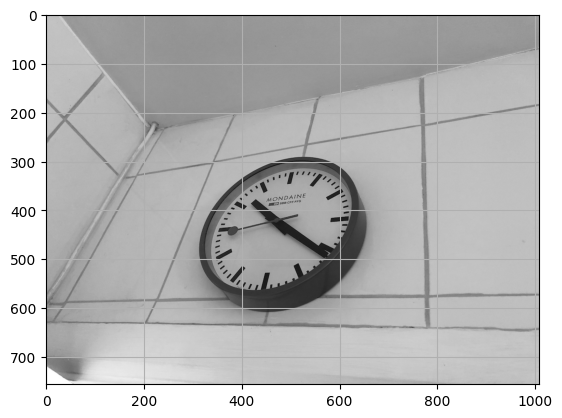

In [6]:
 #----Cargar imagen----
!wget --no-check-certificate https://www.dropbox.com/s/7gr195hwmjebq8b/clock.png

 #----Mostrar imagen----
Clock_img = cv2.imread('clock.png',0)
print('size = ',Clock_img.shape)

plt.imshow(Clock_img,cmap='gray')
plt.grid(True)
plt.show()

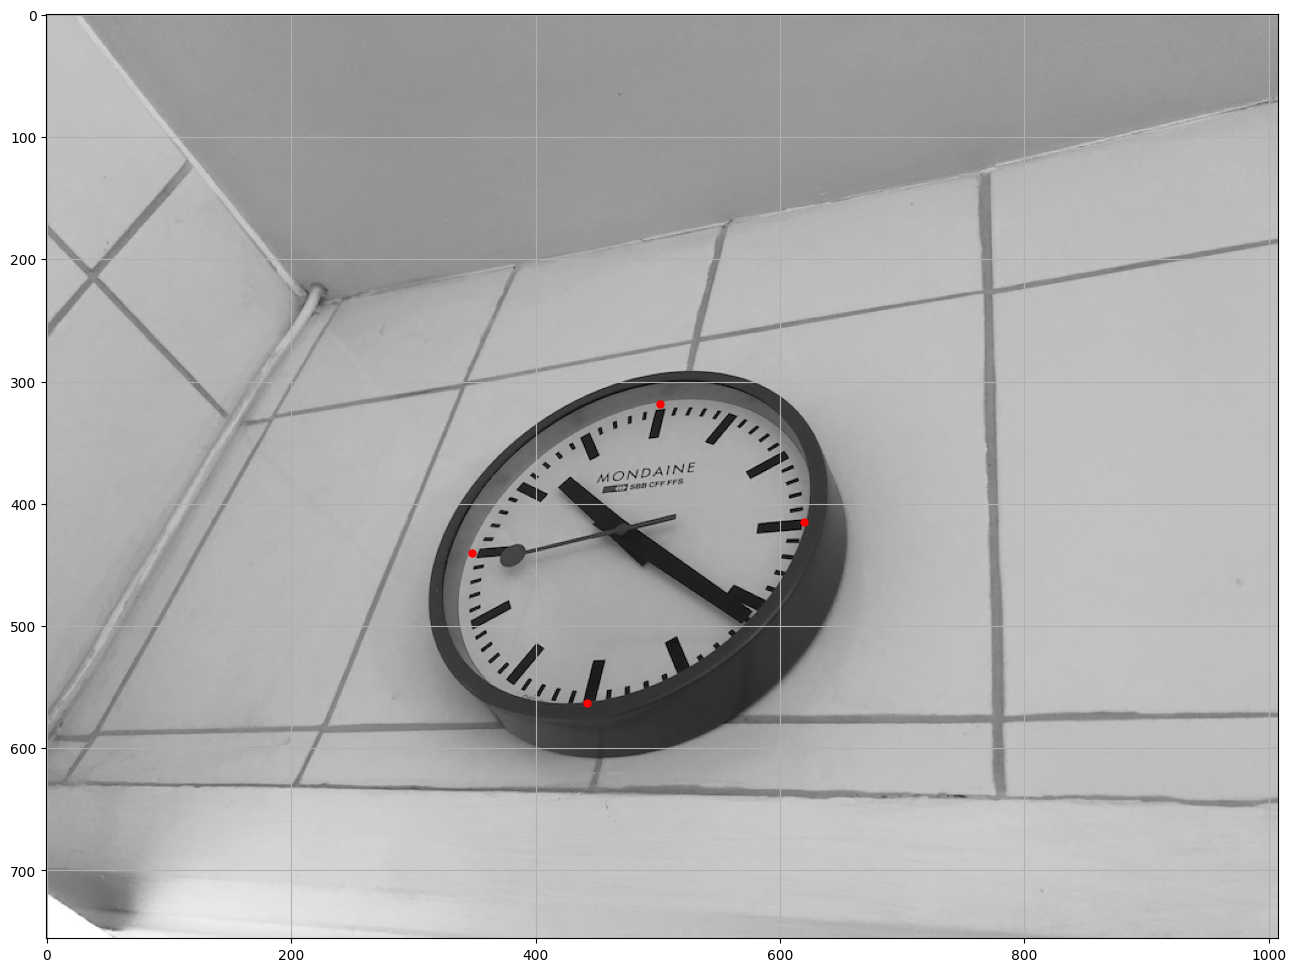

In [54]:
# Coordenadas de las 12, 3, 6 y 9 (mp = m')
xp = np.array([502,620,442,348])  # buscadas manualmente
yp = np.array([318,415,563,440])  # buscadas manualmente

# muestre la imagen con los puntos indicados por los arreglos xp y yp
plt.figure(figsize=(18,12))
plt.imshow(Clock_img,cmap='gray')

plt.scatter(xp, yp, s=25,c='red')
plt.grid(True)
plt.show()

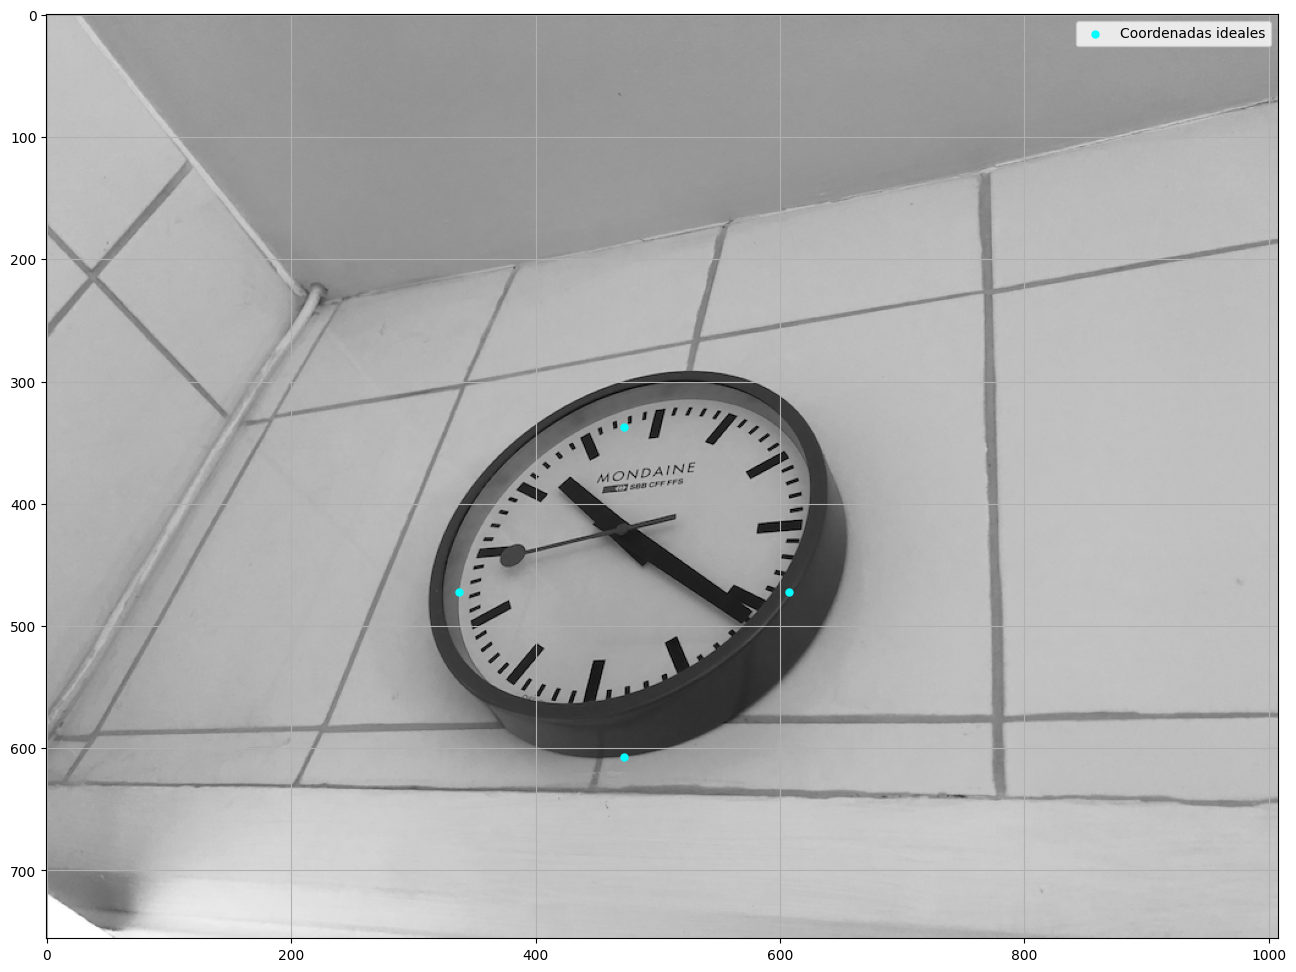

In [51]:
# Coordenadas ideales del reloj, pertenecen a un circulo de radio r centrado en (q,q)
q = 472
r = 135
x = np.array([q,q+r,q,q-r])
y = np.array([q-r,q,q+r,q])

plt.figure(figsize=(18,12))
plt.imshow(Clock_img,cmap='gray')
#plt.plot(x, y,c='b')
plt.scatter(x, y, s=25,c='cyan',label="Coordenadas ideales")
plt.grid(True)
plt.legend()
plt.show()

In [45]:
# Estimation of H: mp = H*m

def homography_matrix(m,mp):
  (x ,y ) = m
  (xp,yp) = mp
  n       = len(x)
  A       = np.zeros((2*n,9))
  for i in range(n):
    j = i*2
    A[j  ,:] = [x[i], y[i], 1,     0,     0, 0, -x[i]*xp[i], -y[i]*xp[i], -xp[i]]
    A[j+1,:] = [  0  ,   0  , 0, x[i], y[i], 1, -x[i]*yp[i], -y[i]*yp[i], -yp[i]]
  np.save('Xmatrix',A)
  [U,S,V] = np.linalg.svd(A)
  h       = V[-1,:]
  H       = np.vstack([h[0:3], h[3:6], h[6:9]])
  return H

In [46]:
# Despliegue los vctores de los puntos de x y de xp
print('mp  = ', (xp,yp))
print('m   = ', (x,y))

#  Realize la estimacion de mp a partir de m
mm = np.vstack([x, y, np.array([1, 1, 1, 1])])
H2 = homography_matrix((x,y),(xp,yp))
mmp = np.dot(H2,mm)
mmp = mmp/mmp[-1,:]

print('Estimacion de mp a partir de m:')
print('mps = ', (mmp[0,:],mmp[1,:]))

mp  =  (array([502, 620, 442, 348]), array([318, 415, 563, 440]))
m   =  (array([472, 607, 472, 337]), array([337, 472, 607, 472]))
Estimacion de mp a partir de m:
mps =  (array([502., 620., 442., 348.]), array([318., 415., 563., 440.]))


In [47]:
def homography(X,H):
  N, M = X.shape
  Hinv  = np.linalg.inv(H)
  Xp    = np.zeros((N,M),np.uint8)

  m = np.ones((N*M,3))
  t = 0
  for i in range(N):
    for j in range(M):
      m[t,0:2] = [j,i]
      t = t+1

  mph = np.dot(Hinv,m.T)  # Transformation m to mp
  mp  = np.divide(mph[0:2,:],mph[2,:])
  mpf = np.fix(mp).astype(int)

  ip = mpf[1,:]
  jp = mpf[0,:]
  ktj = np.logical_and(jp>=0,jp<M)
  kti = np.logical_and(ip>=0,ip<N)
  kt  = np.logical_and(kti,ktj)

  t = 0
  for i in range(N):
    for j in range(M):
      if kt[t]:
        Xp[i,j] = X[ip[t],jp[t]]
      t = t+1
  return Xp

Imagen izquierda: Reloj Circular                                  |       Imagen derecha: Reloj Original


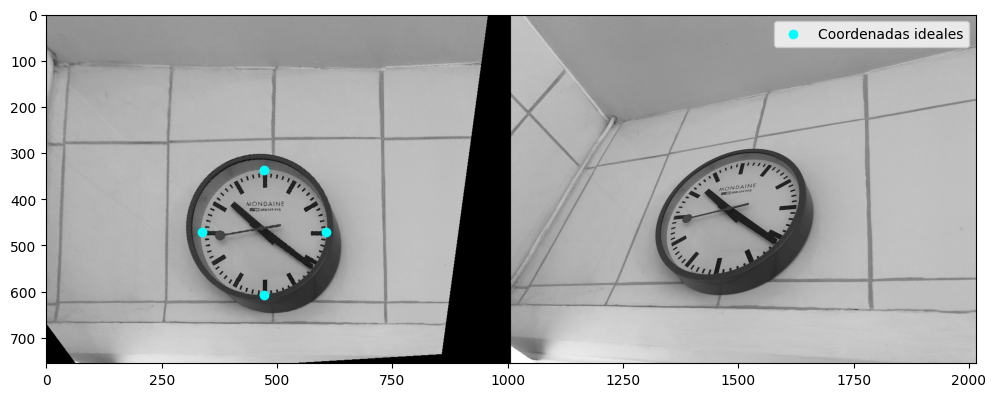

In [53]:
# Calcule las transformaciones
Hinv  = np.linalg.inv(H2)

Y = homography(Clock_img,Hinv)
Z = np.concatenate((Y,Clock_img),axis=1)

# Despliegue ambas imagenes
print('Imagen izquierda: Reloj Circular                                  |       Imagen derecha: Reloj Original')
plt.figure(figsize=(12, 6))
plt.imshow(Z,cmap='gray')
plt.scatter(x,y,c='cyan', label="Coordenadas ideales")

plt.legend()
plt.show()

Imagen izquierda: Reloj Circular                                  |       Imagen derecha: Reloj Original


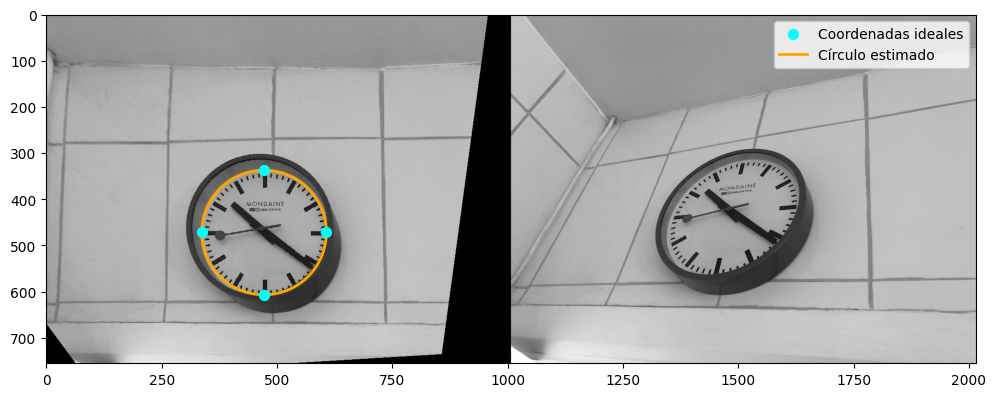

In [52]:
#-----------Adicional para marcar el borde circular del relor ajustado----------
# Calcular el centro del círculo como el promedio de los puntos
xc = np.mean(x)
yc = np.mean(y)

# Calcular el radio como la distancia promedio de los puntos al centro
r = np.mean(np.sqrt((x - xc)**2 + (y - yc)**2))

# Crear puntos del círculo
N = 100  # Más lados para un círculo suave
theta = np.linspace(0, 2*np.pi, N)
x_circle = xc + r * np.cos(theta)
y_circle = yc + r * np.sin(theta)

# Despliegue ambas imagenes
print('Imagen izquierda: Reloj Circular                                  |       Imagen derecha: Reloj Original')
plt.figure(figsize=(12, 6))
plt.imshow(Z,cmap='gray')
plt.scatter(x, y, s=50, c='cyan', label="Coordenadas ideales", zorder= 1)
plt.plot(x_circle, y_circle, c='orange', linewidth=2, label="Círculo estimado", zorder=0)

plt.legend()
plt.show()